In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import os

mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.size'] = 20

In [4]:
ddir = '/glade/collections/cmip/CMIP6/PMIP/MIROC/MIROC-ES2L/lgm/r1i1p1f2/Omon/fgco2/gn/v20191002/fgco2'
dfile = 'fgco2_Omon_MIROC-ES2L_lgm_r1i1p1f2_gn_320001-329912.nc'

ncf = os.path.join(ddir, dfile)

ds = xr.open_dataset(ncf)

fgco2 = ds['fgco2']

In [6]:
fgco2_climo = fgco2.groupby('time.season').mean('time')

/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/xarray/core/common.py:657: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims
/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [24]:
def plotstereo(fig, axnum, data, seas, clim):
    axs = fig.add_subplot(2, 2, axnum, projection=ccrs.SouthPolarStereo())
    axs.coastlines()
    axs.gridlines()
    axs.set_extent([-180, 180, -90, -40], crs=ccrs.PlateCarree())
    im = data.sel(season=seas).plot.pcolormesh('longitude', 'latitude', ax=axs, transform=ccrs.PlateCarree(),
                                              cbar_kwargs={'label': 'kg m$^{-2}$ s$^{-1}$'})
    im.set_clim(clim[0], clim[1])
    
    return im
    

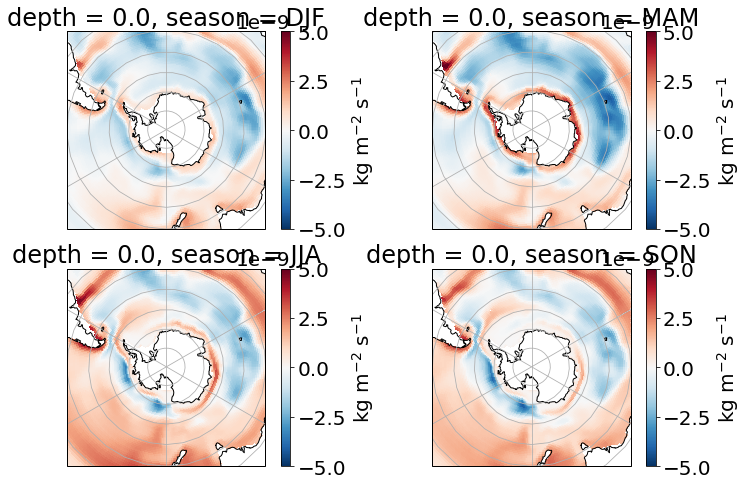

In [25]:
fgco2_plt = fgco2_climo[:, :100, :]

fig = plt.figure(1)
im1 = plotstereo(fig, 1, fgco2_plt, "DJF", [-5e-9, 5e-9])
im2 = plotstereo(fig, 2, fgco2_plt, "MAM", [-5e-9, 5e-9])
im3 = plotstereo(fig, 3, fgco2_plt, "JJA", [-5e-9, 5e-9])
im4 = plotstereo(fig, 4, fgco2_plt, "SON", [-5e-9, 5e-9])

In [16]:
fgco2

<xarray.DataArray 'fgco2' (time: 1200, y: 256, x: 360)>
[110592000 values with dtype=float32]
Coordinates:
  * time       (time) object 3200-01-16 12:00:00 ... 3299-12-16 12:00:00
  * y          (y) float64 -88.0 -85.75 -85.25 -84.75 ... 148.6 150.5 152.4
  * x          (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
    depth      float64 ...
Attributes:
    standard_name:   surface_downward_mass_flux_of_carbon_dioxide_expressed_a...
    long_name:       Surface Downward Flux of Total CO2
    comment:         Gas exchange flux of CO2 (positive into ocean)
    units:           kg m-2 s-1
    original_name:   OCCO2F
    original_units:  kg/m^2/s
    history:         2019-09-13T11:03:24Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello

In [22]:
sfile = 'siconc_SImon_MIROC-ES2L_lgm_r1i1p1f2_gn_320001-329912.nc'

dss = xr.open_dataset(sfile)

siconc = dss['siconc']
siconc_climo = siconc.groupby('time.season').mean('time')

/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/xarray/core/common.py:657: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims
/glade/u/home/apauling/miniconda3/envs/isotope/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


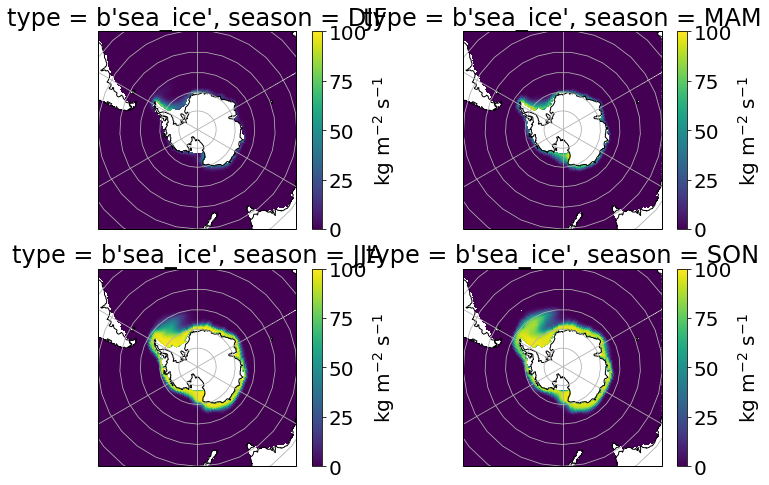

In [27]:
siconc_plt = siconc_climo[:, :100, :]

fig2 = plt.figure(1)
im1 = plotstereo(fig2, 1, siconc_plt, "DJF", [0, 100])
im2 = plotstereo(fig2, 2, siconc_plt, "MAM", [0, 100])
im3 = plotstereo(fig2, 3, siconc_plt, "JJA", [0, 100])
im4 = plotstereo(fig2, 4, siconc_plt, "SON", [0, 100])